# DBSCAN(Titanic)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train1=pd.read_csv(r'C:\Users\Nelson\Documents\Sync\Proj_Titanic\Datas\train2.csv',sep=',')
trainP=train1.drop(['Unnamed: 0'],axis=1)
trainP
trainA=trainP.copy()
trainA

,Pclass,SibSp,Parch,Fare,Sex Encode,Embarked-2,Age-sep
0,3,1,0,130.982998,1,2,1
1,1,1,0,712.833000,0,0,3
2,3,0,0,7.925000,0,2,2
3,1,1,0,130.982998,0,2,3
4,3,0,0,130.982998,1,2,3
...,...,...,...,...,...,...,...
886,2,0,0,13.000000,1,2,2
887,1,0,0,30.000000,0,2,1
888,3,1,2,130.982998,0,2,2
889,1,0,0,30.000000,1,0,2


In [3]:
#Normalizo con z_score
from sklearn.preprocessing import StandardScaler
normalizador2=StandardScaler()
trainB=normalizador2.fit_transform(trainA)
trainB=pd.DataFrame(trainB, columns=['Pclass','SibSp','Parch','Fare','Sex Encode','Embarked-2','Age-sep'])
#trainB.describe()
trainB

,Pclass,SibSp,Parch,Fare,Sex Encode,Embarked-2,Age-sep
0,0.827377,0.432793,-0.473674,0.000000,0.737695,0.581114,-0.943913
1,-1.566107,0.432793,-0.473674,3.916997,-1.355574,-1.938460,0.793745
2,0.827377,-0.474545,-0.473674,-0.828423,-1.355574,0.581114,-0.075084
3,-1.566107,0.432793,-0.473674,0.000000,-1.355574,0.581114,0.793745
4,0.827377,-0.474545,-0.473674,0.000000,0.737695,0.581114,0.793745
...,...,...,...,...,...,...,...
886,-0.369365,-0.474545,-0.473674,-0.794258,0.737695,0.581114,-0.075084
887,-1.566107,-0.474545,-0.473674,-0.679815,-1.355574,0.581114,-0.943913
888,0.827377,0.432793,2.008933,0.000000,-1.355574,0.581114,-0.075084
889,-1.566107,-0.474545,-0.473674,-0.679815,0.737695,-1.938460,-0.075084


In [4]:
#Separo 4 filas
test1=pd.DataFrame(trainB.loc[[20,120,530,640]],columns=['Pclass','SibSp','Parch','Fare','Sex Encode','Embarked-2','Age-sep'])
test1=test1.reset_index(drop=True)
test1

,Pclass,SibSp,Parch,Fare,Sex Encode,Embarked-2,Age-sep
0,-0.369365,-0.474545,-0.473674,-0.706742,0.737695,0.581114,0.793745
1,-0.369365,1.340132,-0.473674,0.000000,0.737695,0.581114,-0.943913
2,-0.369365,0.432793,0.767630,-0.706742,-1.355574,0.581114,-1.812742
3,0.827377,-0.474545,-0.473674,-0.353031,0.737695,0.581114,-0.943913


In [5]:
#Le saco las 4 filas al conjunto inicial me queda trainC para entrenar
trainC=trainB.drop([20,120,530,640],axis=0)
trainC

,Pclass,SibSp,Parch,Fare,Sex Encode,Embarked-2,Age-sep
0,0.827377,0.432793,-0.473674,0.000000,0.737695,0.581114,-0.943913
1,-1.566107,0.432793,-0.473674,3.916997,-1.355574,-1.938460,0.793745
2,0.827377,-0.474545,-0.473674,-0.828423,-1.355574,0.581114,-0.075084
3,-1.566107,0.432793,-0.473674,0.000000,-1.355574,0.581114,0.793745
4,0.827377,-0.474545,-0.473674,0.000000,0.737695,0.581114,0.793745
...,...,...,...,...,...,...,...
886,-0.369365,-0.474545,-0.473674,-0.794258,0.737695,0.581114,-0.075084
887,-1.566107,-0.474545,-0.473674,-0.679815,-1.355574,0.581114,-0.943913
888,0.827377,0.432793,2.008933,0.000000,-1.355574,0.581114,-0.075084
889,-1.566107,-0.474545,-0.473674,-0.679815,0.737695,-1.938460,-0.075084


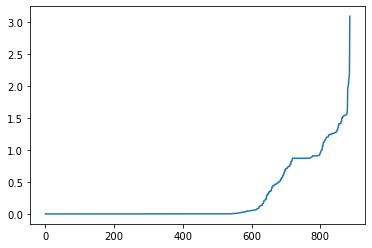

In [28]:
from sklearn.neighbors import NearestNeighbors
vecinos = NearestNeighbors(n_neighbors=14)#Puse 14 como medidad de puntos en cada elipse
vecinos_fit = vecinos.fit(trainC)
distancias, indices = vecinos_fit.kneighbors(trainC)
distancias
distancias = np.sort(distancias, axis=0)
distancias = distancias[:,1]
plt.plot(distancias)



In [22]:
"""from kneed import DataGenerator, KneeLocator
kl = KneeLocator(, curve="convex", direction="increasing")
kl.elbow"""

TypeError: __init__() missing 1 required positional argument: 'y'

In [38]:
from sklearn.cluster import DBSCAN
clasificador1=DBSCAN(eps=1.8, min_samples=14).fit_predict(trainC)


In [39]:
from sklearn.metrics import silhouette_score
silhProm=silhouette_score(trainC, clasificador1)
silhProm

0.24194113028926023